In [6]:
import _pickle as pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier

# Loading in the Data (can be changed to the other features .pkl file if needed)
with open("top10_df.pkl", 'rb') as fp:
    df = pickle.load(fp)

Scaling the Data

In [7]:
### Scaling the Data
# Importing the Scacler
from sklearn.preprocessing import StandardScaler

# Instantiating the Scaler
scaler = StandardScaler()

# Removing the class labels from the dataset (because we do not scale the class labels)
features_df = df.drop(["Decision"], 1)

# Creating a new Scaled DF
scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

# Replacing the old DF with the new Scaled DF
df = scaled_df.join(df.Decision)

### Splitting the Data
# Separating the data into X and y variables
X = df.drop(["Decision"], 1)
y = df.Decision

# Creating training and testing sets using the default splitting ratios
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# Fitting and training the dummy
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

# Dummy predictions
dum_pred = dummy.predict(X_test)

#Printing out results
report = classification_report(y_test, dum_pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.19      0.19      0.19      2716
         Buy       0.37      0.37      0.37      5109
        Hold       0.44      0.43      0.43      6067

    accuracy                           0.36     13892
   macro avg       0.33      0.33      0.33     13892
weighted avg       0.36      0.36      0.36     13892



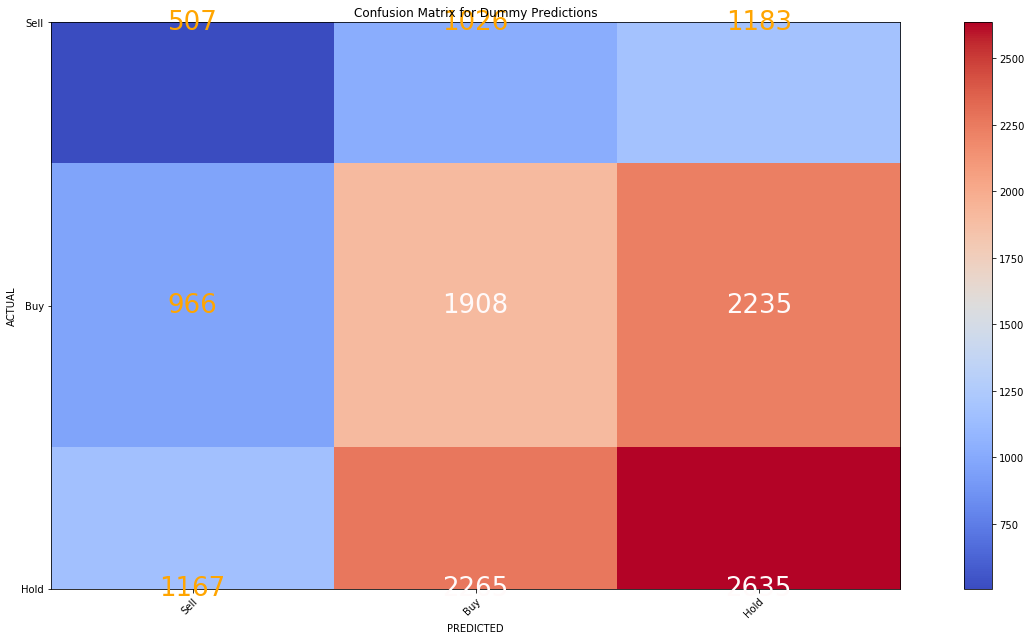

In [13]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):
    """
    Creates a more visually appealing confusion matrix
    """

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(18,9))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

# Visualizing the confusion matrix using the function above
plot_confusion_matrix(y_test, dum_pred, title="Confusion Matrix for Dummy Predictions")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show();